# Analisi e studio delle distribuzioni dei dati

Come suggerisce il titolo, in questo notebook verrà fatta una prima analisi dettagliata del dataset protagonista del progetto di Machine Learning e verranno estrapolate quindi tutte le informazioni utili per comprenderne la struttura: la presenza di eventuali valori nulli o errati, la distribuzione dei valori per le varie feature, la distribuzione delle classi in tutto il dataset e la presenza di outlier che possono interferire con nel training dei vari modelli che verranno utilizzati nel progetto.

In [11]:
import pandas as pd 
from load_data_and_distribution_analisys import load_data, print_summary, plot_classes_distribution, boxplot, print_max_values, print_outliers, remove_outliers_v1, remove_outliers_v2, categorical_encoding, split_dataset_v1, normalize_data
pd.set_option('display.max_columns', None)

In [2]:
dataset = load_data()

Path to dataset files: /Users/marcodeano/.cache/kagglehub/datasets/sooyoungher/smoking-drinking-dataset/versions/2


In [3]:
print_summary(dataset)


Prime righe del dataset:
    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0         1.0  120.0  80.0   99.0      193.0       48.0      126.0   
1         1.0  130.0  82.0  106.0      228.0       55.0      148.0   
2         1.0  120.0  70.0   98.0      136.0       41.0       74.0   
3         1.0  145.0  87.0   95.0      201.0       76.0      104.0   
4         1.0  138.0  82.0  101.0      199.0       61.0      117.0   

   triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0   

__Prime considerazioni__: I dati sembrano non contenere dati nulli o NaN, però si osserva facilmente che per alcune feature ci sono dei dati che sembrano essere irrealistici (Es.: per la feature **waistline** la media risulta essere _81_, il 4° quartile _87_ e il valore massimo _999_); quindi nonostante la non presenza di valori nulli, bisogna verificare se sono presenti valori mancanti codificati in altro modo.

/Users/marcodeano/Desktop/UniVr/Machine learning/ML_project_2025/load_data_and_distribution_analisys.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoke.index, y=smoke.values, palette="Blues_d")
/Users/marcodeano/Desktop/UniVr/Machine learning/ML_project_2025/load_data_and_distribution_analisys.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drink.index, y=drink.values, palette="Greens_d")


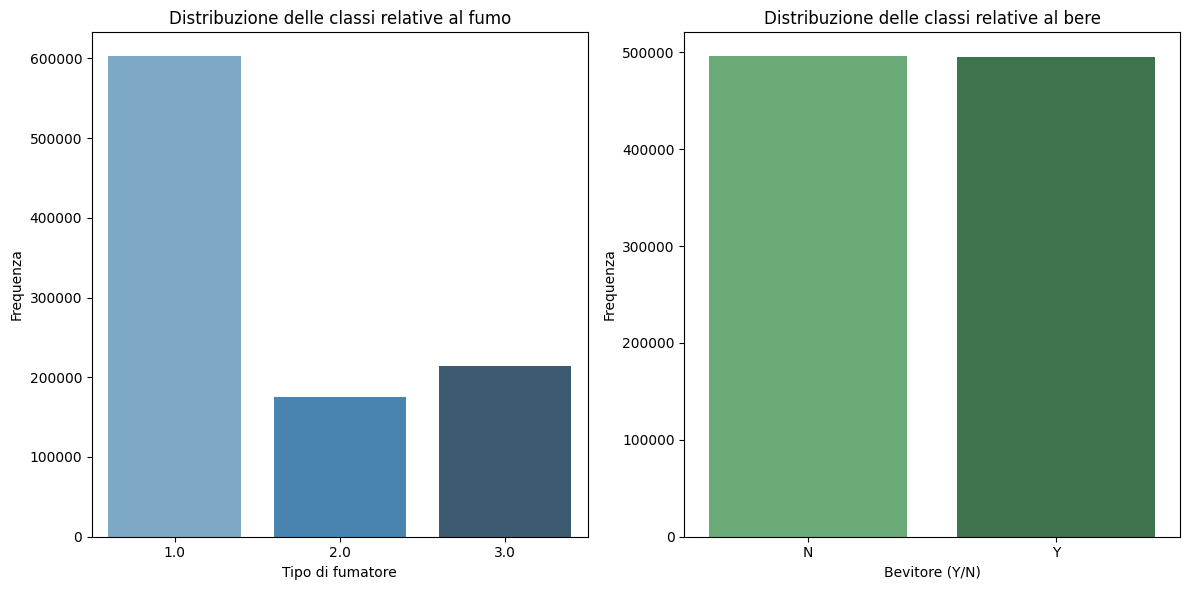

In [4]:
plot_classes_distribution(dataset)

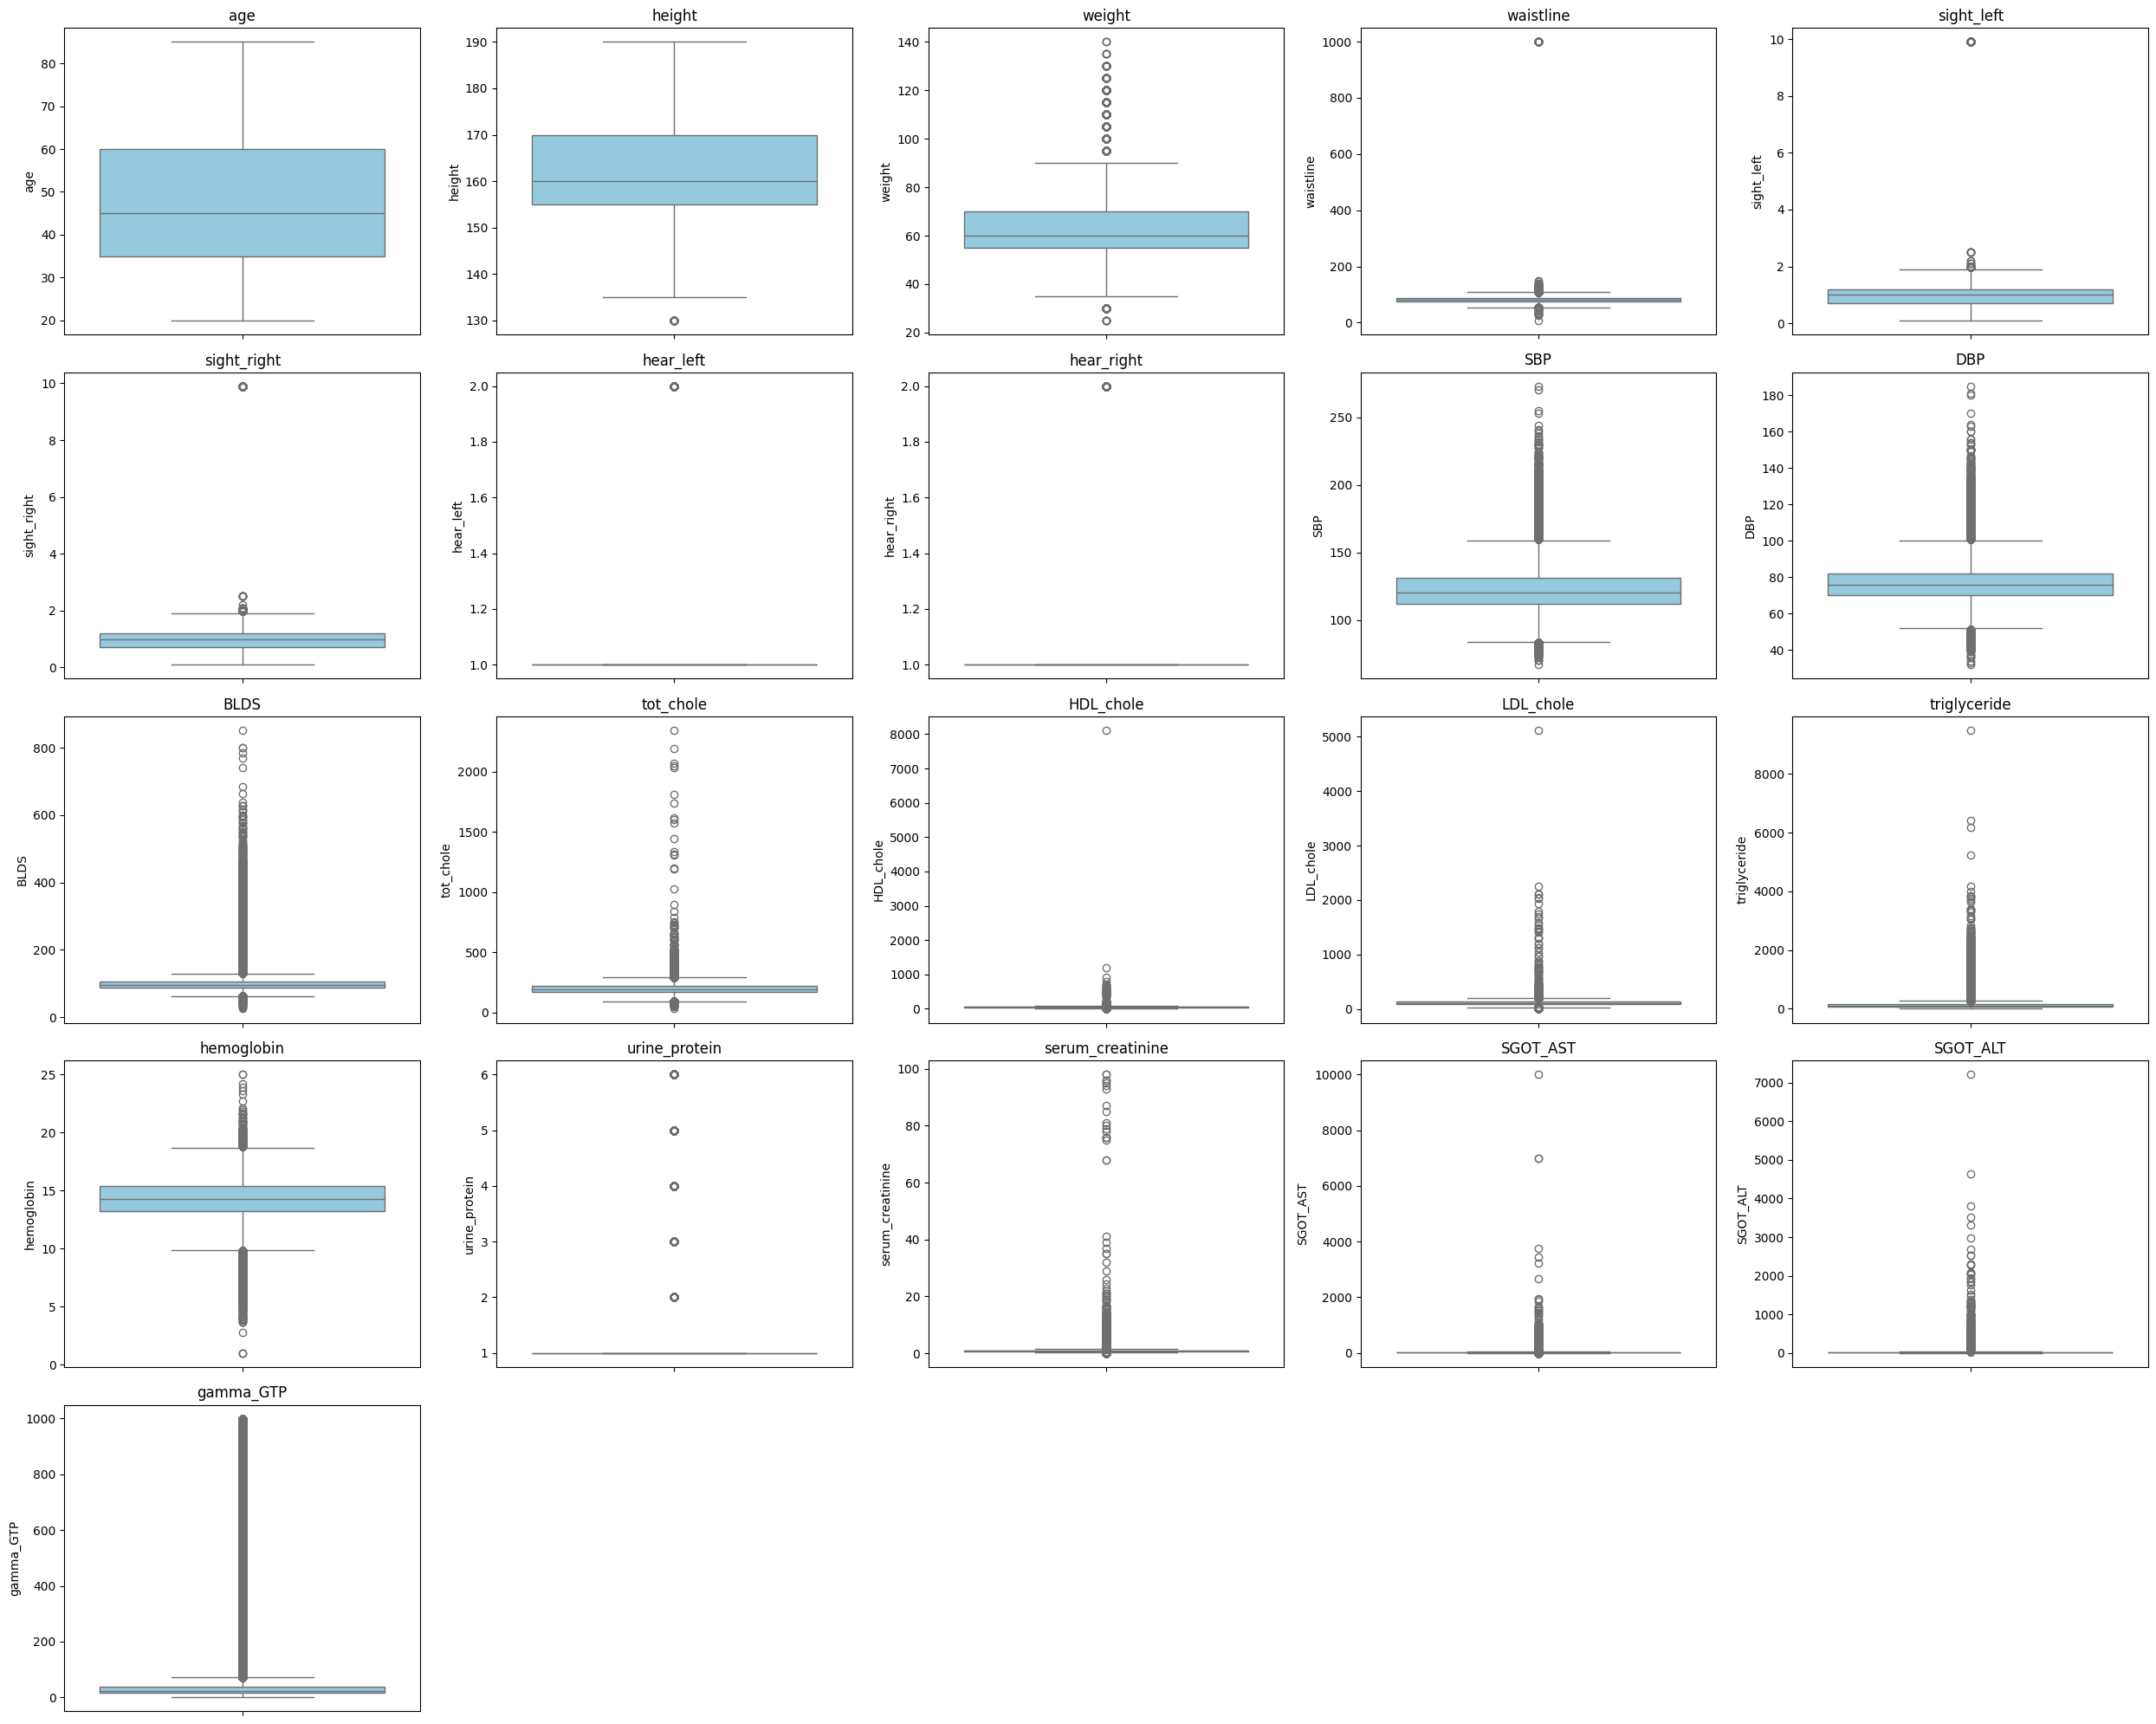

In [5]:
boxplot(dataset)

In [6]:
print_max_values(dataset)

Colonna: age
    -Valore massimo: 85
    -Occorrenze del massimo: 3291
    -Secondo massimo: 80
    -Distanza tra massimo e secondo massimo: 5
    -Media: 47.614490803412735
    -Distanza tra massimo e media: 37.385509196587265

Colonna: height
    -Valore massimo: 190
    -Occorrenze del massimo: 363
    -Secondo massimo: 185
    -Distanza tra massimo e secondo massimo: 5
    -Media: 162.24062537196903
    -Distanza tra massimo e media: 27.75937462803097

Colonna: weight
    -Valore massimo: 140
    -Occorrenze del massimo: 3
    -Secondo massimo: 135
    -Distanza tra massimo e secondo massimo: 5
    -Media: 63.28405017017268
    -Distanza tra massimo e media: 76.71594982982732

Colonna: waistline
    -Valore massimo: 999.0
    -Occorrenze del massimo: 57
    -Secondo massimo: 149.1
    -Distanza tra massimo e secondo massimo: 849.9
    -Media: 81.23335777821268
    -Distanza tra massimo e media: 917.7666422217874

Colonna: sight_left
    -Valore massimo: 9.9
    -Occorrenze del mass

In [7]:
print_outliers(dataset)

Colonna: age
    -Valori fuori scala: 0
    -Limiti: -2.5 - 97.5

Colonna: height
    -Valori fuori scala: 86
    -Limiti: 132.5 - 192.5

Colonna: weight
    -Valori fuori scala: 19221
    -Limiti: 32.5 - 92.5

Colonna: waistline
    -Valori fuori scala: 4417
    -Limiti: 53.54999999999999 - 108.35

Colonna: sight_left
    -Valori fuori scala: 11582
    -Limiti: -0.050000000000000044 - 1.95

Colonna: sight_right
    -Valori fuori scala: 10495
    -Limiti: -0.050000000000000044 - 1.95

Colonna: hear_left
    -Valori fuori scala: 31222
    -Limiti: 1.0 - 1.0

Colonna: hear_right
    -Valori fuori scala: 30212
    -Limiti: 1.0 - 1.0

Colonna: SBP
    -Valori fuori scala: 15836
    -Limiti: 83.5 - 159.5

Colonna: DBP
    -Valori fuori scala: 13122
    -Limiti: 52.0 - 100.0

Colonna: BLDS
    -Valori fuori scala: 64202
    -Limiti: 62.5 - 130.5

Colonna: tot_chole
    -Valori fuori scala: 11298
    -Limiti: 94.0 - 294.0

Colonna: HDL_chole
    -Valori fuori scala: 13858
    -Limiti: 16.0 - 

### Considerazioni

Un'analisi più approfondita ha permesso di individuare la presenza di alcuni outlier in specifiche feature, in particolare confrontando il valore massimo presente nel dataset con il secondo valore massimo per ciascuna di esse; è importante sottolineare però che non tutte le feature mostrano grosse differenze tra il primo e il secondo massimo ed in molti casi sono presenti molti valori tra il massimo e la media.

Abbiamo deciso innanzitutto di eliminare tutti i sample contenenti almeno una feature con valori estremamente fuori scala rispetto alla media (es: waistline = 999) e successivamente, abbiamo sfruttato uno strumento statistico per rimuovere anche i campioni con valori meno estremi ma comunque anomali rispetto alla distribuzione generale.  A tale scopo abbiamo utilizzato lo Z-score: una misura statistica che indica di quante deviazioni standard un valore di una feature si discosta dalla media; per definire la soglia di esclusione dei sample, abbiamo stabilito un valore limite di Z-score pari a 5, oltre il quale i campioni vengono considerati anomali ed esclusi dal dataset. In questo modo escludiamo da tutte le operazioni di predizione future, tutti quei sample che o hanno valori errati oppure rappresentano casi clinici particolari che andrebbero ad influire negativamente sui risultati del progetto.

In [12]:
dataset_cleaned = remove_outliers_v1(dataset)
dataset_cleaned = remove_outliers_v2(dataset_cleaned)

Number of rows removed: 74544


Ora verranno rieseguite tutte le operazioni di visualizzazione dei dati presenti nel dataset per comprendere la distribuzione di questi dopo l'operazione di rimozione degli outliers.

In [13]:
print_summary(dataset_cleaned)


Prime righe del dataset:
    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0         1.0  120.0  80.0   99.0      193.0       48.0      126.0   
1         1.0  130.0  82.0  106.0      228.0       55.0      148.0   
2         1.0  120.0  70.0   98.0      136.0       41.0       74.0   
3         1.0  145.0  87.0   95.0      201.0       76.0      104.0   
4         1.0  138.0  82.0  101.0      199.0       61.0      117.0   

   triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0   

/Users/marcodeano/Desktop/UniVr/Machine learning/ML_project_2025/load_data_and_distribution_analisys.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoke.index, y=smoke.values, palette="Blues_d")
/Users/marcodeano/Desktop/UniVr/Machine learning/ML_project_2025/load_data_and_distribution_analisys.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drink.index, y=drink.values, palette="Greens_d")


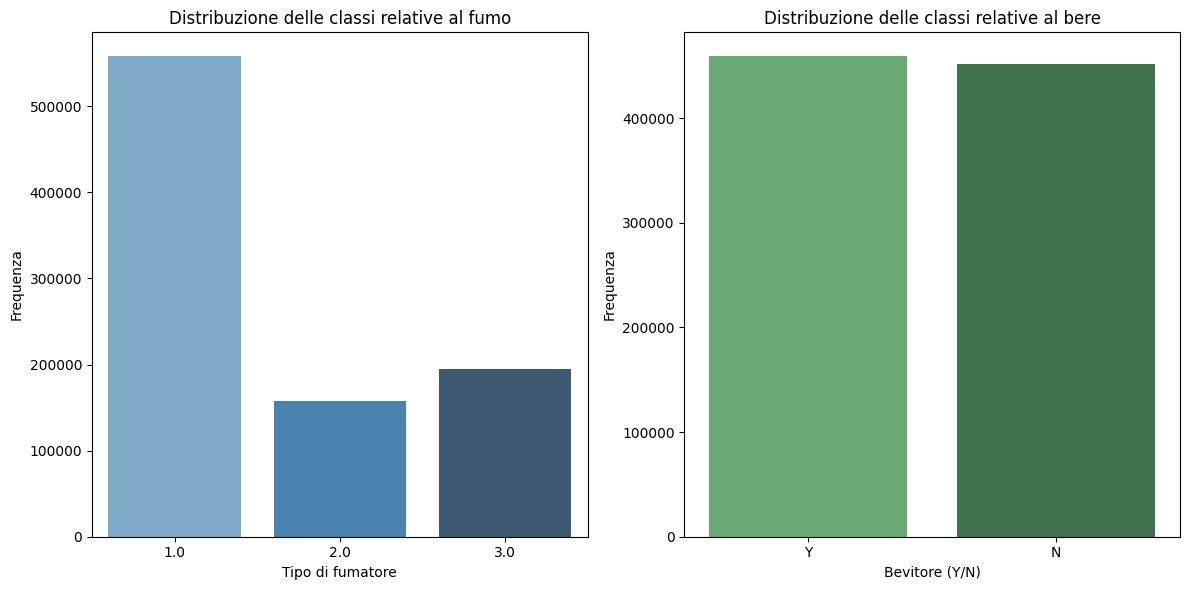

In [14]:
plot_classes_distribution(dataset_cleaned)

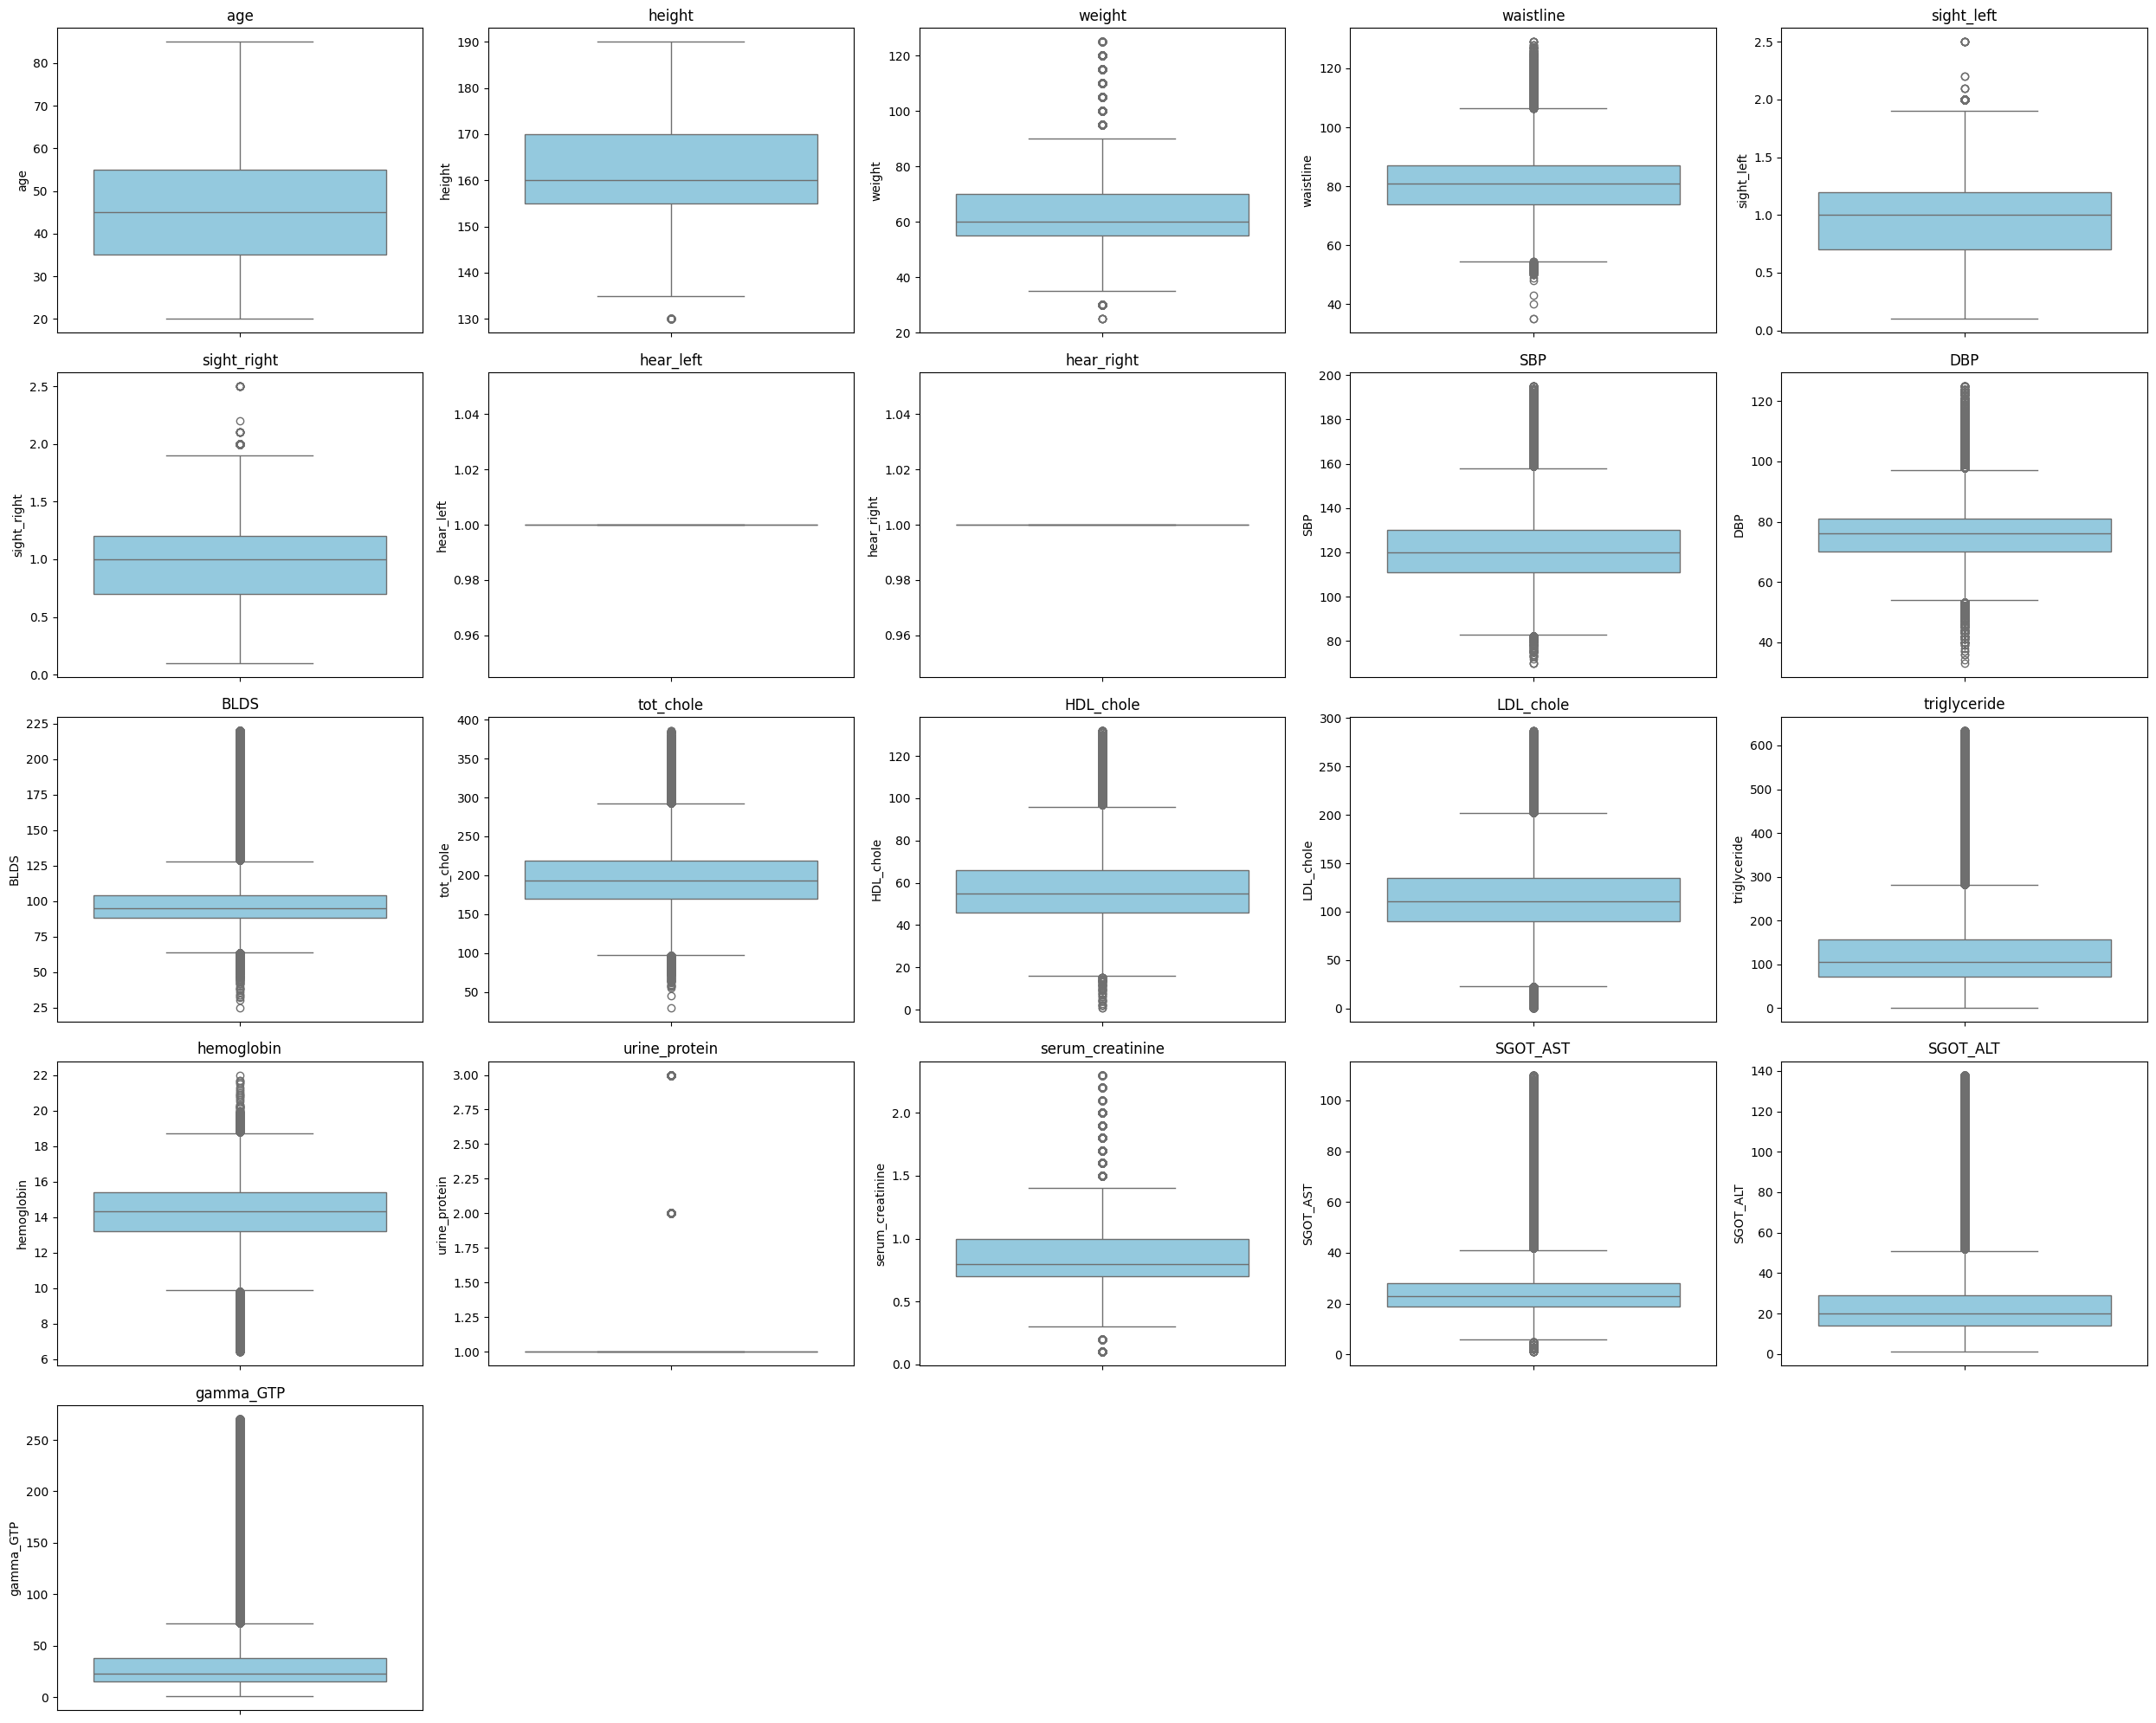

In [15]:
boxplot(dataset_cleaned)

In [16]:
print_max_values(dataset_cleaned)

Colonna: age
    -Valore massimo: 85
    -Occorrenze del massimo: 1990
    -Secondo massimo: 80
    -Distanza tra massimo e secondo massimo: 5
    -Media: 46.77418292003879
    -Distanza tra massimo e media: 38.22581707996121

Colonna: height
    -Valore massimo: 190
    -Occorrenze del massimo: 344
    -Secondo massimo: 185
    -Distanza tra massimo e secondo massimo: 5
    -Media: 162.3794958754746
    -Distanza tra massimo e media: 27.62050412452541

Colonna: weight
    -Valore massimo: 125
    -Occorrenze del massimo: 63
    -Secondo massimo: 120
    -Distanza tra massimo e secondo massimo: 5
    -Media: 63.24849620385512
    -Distanza tra massimo e media: 61.75150379614488

Colonna: waistline
    -Valore massimo: 129.0
    -Occorrenze del massimo: 5
    -Secondo massimo: 128.0
    -Distanza tra massimo e secondo massimo: 1.0
    -Media: 80.89702996829317
    -Distanza tra massimo e media: 48.10297003170683

Colonna: sight_left
    -Valore massimo: 2.5
    -Occorrenze del massimo: 

In [17]:
print_outliers(dataset_cleaned)

Colonna: age
    -Valori fuori scala: 0
    -Limiti: 5.0 - 85.0

Colonna: height
    -Valori fuori scala: 60
    -Limiti: 132.5 - 192.5

Colonna: weight
    -Valori fuori scala: 16940
    -Limiti: 32.5 - 92.5

Colonna: waistline
    -Valori fuori scala: 5645
    -Limiti: 54.5 - 106.5

Colonna: sight_left
    -Valori fuori scala: 8141
    -Limiti: -0.050000000000000044 - 1.95

Colonna: sight_right
    -Valori fuori scala: 7061
    -Limiti: -0.050000000000000044 - 1.95

Colonna: hear_left
    -Valori fuori scala: 0
    -Limiti: 1.0 - 1.0

Colonna: hear_right
    -Valori fuori scala: 0
    -Limiti: 1.0 - 1.0

Colonna: SBP
    -Valori fuori scala: 13430
    -Limiti: 82.5 - 158.5

Colonna: DBP
    -Valori fuori scala: 26204
    -Limiti: 53.5 - 97.5

Colonna: BLDS
    -Valori fuori scala: 52186
    -Limiti: 64.0 - 128.0

Colonna: tot_chole
    -Valori fuori scala: 10026
    -Limiti: 96.5 - 292.5

Colonna: HDL_chole
    -Valori fuori scala: 12494
    -Limiti: 16.0 - 96.0

Colonna: LDL_chole
 

Una volta terminata la fase di analisi e pulizia dei dati, sarebbe opportuno procedere con le operazioni di encoding e scaling dei dati (visto che sono presenti features con valori molto grandi e altre con valori più piccoli), però pensiamo sia più opportuno fare queste operazioni eventualmente in un secondo momento a seconda dei modelli di Machine Learning che decidiamo di utilizzare.
Per ora ci limitiamo a fare l'encoding delle feature categoriali.

In [18]:
dataset_cleaned = categorical_encoding(dataset_cleaned)

   sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0         1.0  120.0  80.0   99.0      193.0       48.0      126.0   
1         1.0  130.0  82.0  106.0      228.0       55.0      148.0   
2         1.0  120.0  70.0   98.0      136.0       41.0       74.0   
3         1.0  145.0  87.0   95.0      201.0       76.0      104.0   
4         1.0  138.0  82.0  101.0      199.0       61.0      117.0   

   triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0          92.0        17.1         